<a href="https://colab.research.google.com/github/lucas-allves/projects_public/blob/master/Investigating_Netflix_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigando filmes da Netflix

Netflix! O que começou em 1997 como um serviço de aluguel de DVDs se tornou a maior empresa de entretenimento/mídia por capitalização de mercado, com mais de 200 milhões de assinantes em janeiro de 2021.

Dado o grande número de filmes e séries disponíveis na plataforma, é uma oportunidade perfeita para flexibilizar nossas habilidades de manipulação de dados e mergulhar na indústria do entretenimento.


## 1. Carregando os dados

In [1]:
# Criando as listas de anos e durações

anos = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
duracao = [103,101,99,100,100,95,95,96,93,90]

# Criando um dicionário com as duas listas
filme_dict = {'anos':anos,'duracao':duracao}

filme_dict

{'anos': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'duracao': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## 2. Criando um DataFrame a partir de um dicionário

Para converter nosso dicionário filme_dict em um DataFrame, primeiro precisaremos importar a biblioteca `pandas` para executar os códigos.

In [3]:
# Importando a biblioteca pandas
import pandas as pd

# Criando um DataFrame a partir do dicionário
filme_df = pd.DataFrame(filme_dict)

# Print the DataFrame
filme_df

,anos,duracao
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## 3. Uma análise visual dos dados

Através de um DataFrame, a maneira mais comum de trabalhar com dados tabulares em Python, queremos acompanhar a duração dos filmes ao longo do tempo. Uma ótimo maneira será uma visualização dos dados.

Dado que os dados são contínuos, um gráfico de linhas seria uma boa escolha, com as datas representadas ao longo do eixo x e a duração média em minutos ao longo do eixo y. Isso nos permitirá identificar facilmente quaisquer tendências nas durações dos filmes.

 Há muitas maneiras de visualizar dados em Python, mas matploblib.pyplot é um dos pacotes mais comuns para fazer isso.

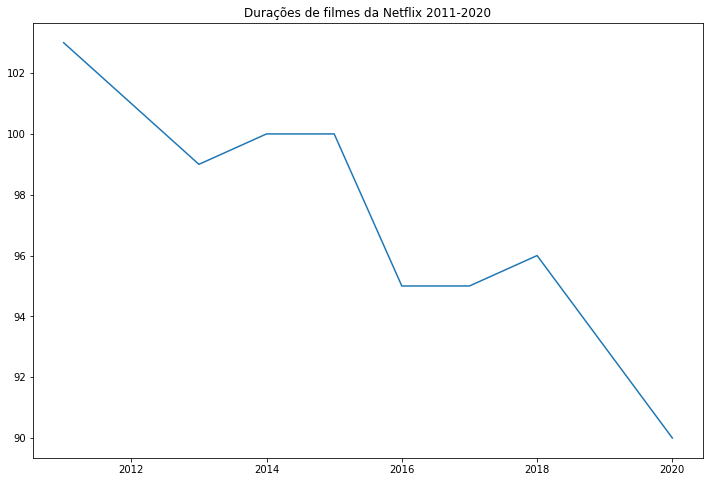

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))

# Desenhando um gráfico de linhas
plt.plot(filme_df['anos'],filme_df['duracao'])

# Criando um título
plt.title('Durações de filmes da Netflix 2011-2020')


# Mostrando o gráfico
plt.show()

Bem, parece que há algo na ideia de que a duração dos filmes diminuiu nos últimos dez anos!

## 4. Carregando os dados de um CSV

- Como é essa tendência por um longo período de tempo?

- Isso é explicável por algo como o gênero de entretenimento?

Ao carregar um arquivo CSV de filmes da Netflix, iremos analisar com dados reais se isso realmente faz sentido.

In [11]:
# Lendo um arquivo CSV como um DataFrame

netflix_df = pd.read_csv('/content/netflix_data.csv')

In [14]:
# Imprimindo as 5 primeiras linhas

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [15]:
# Imprimindo as 5 últimas linhas

netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,"March 1, 2020",2019,90,This documentary delves into the mystique behi...,Documentaries


## 5. Filtragem de filmes!

Pronto, temos nossos dados! Agora podemos mergulhar e começar a olhar para as durações dos filmes.

Examinando a coluna, fica claro que também há programas de TV no conjunto de dados! Além disso, a coluna de duração que planejamos usar parece representar valores diferentes dependendo se a linha é um filme ou um programa.

Com o DataFrame, é possível filtrar dados rapidamente e podemos selecionar linhas onde o tipo é Filme. Além disso, não precisamos de informações de todas as colunas, então vamos criar um novo DataFrame netflix_movies contendo apenas título, país, gênero, ano_de_lançamento e duração.

In [18]:
# Subconjunto do DataFrame para o tipo "Filme"

netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Seleciona apenas as colunas de interesse

netflix_movies_col_subset = netflix_df_movies_only.loc[:,['title','country',
                                                          'genre','release_year',
                                                         'duration']]

netflix_movies_col_subset.head()                                                         

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 6. Criando um gráfico de dispersão

Lemos os dados brutos, linhas selecionadas de filmes e limitamos nosso DataFrame às nossas colunas de interesse. Vamos tentar visualizar os dados novamente para inspecionar os dados em um intervalo de tempo maior.

Desta vez, não estamos mais trabalhando com agregados, mas com filmes individuais. Um gráfico de linhas não é mais uma boa escolha para nossos dados, então vamos tentar um gráfico de dispersão. Vamos novamente traçar o ano de lançamento no eixo x e a duração do filme no eixo y.

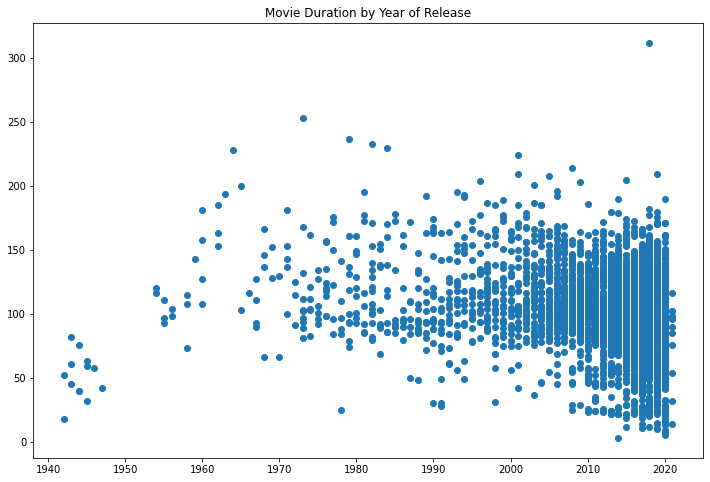

In [21]:
# Criando uma figura e alterando o tamanho

fig = plt.figure(figsize=(12,8))

# Criando um gráfico de dispersão de duração versus ano

plt.scatter(netflix_movies_col_subset['release_year'],
            netflix_movies_col_subset['duration'])

# Título
plt.title('Movie Duration by Year of Release')

# Mostrando o gráfico
plt.show()

Após uma inspeção mais aprofundada, algo mais está acontecendo. Alguns desses filmes têm menos de uma hora de duração! Vamos filtrar nosso DataFrame para filmes com duração inferior a 60 minutos e observar os gêneros. Isso pode nos dar algumas dicas sobre o que está diminuindo a média.

In [22]:
# Filtrando por durações inferiores a 60 minutos

short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]

short_movies.head(10)


,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Parece que muitos dos filmes com menos de 60 minutos se enquadram em gêneros como "Crianças", "Stand-Up" e "Documentários". Este é um resultado lógico, já que esses tipos de filmes provavelmente têm menos de 90 minutos de sucesso de bilheteria de Hollywood.

Poderíamos eliminar essas linhas do nosso DataFrame e plotar os valores novamente. Mas outra maneira interessante de explorar o efeito desses gêneros em nossos dados seria plotá-los, mas marcá-los com uma cor diferente.

Em Python, há muitas maneiras de fazer isso, mas uma maneira divertida pode ser usar um loop para gerar uma lista de cores com base no conteúdo da coluna de gênero. Assim como fizemos no Python Intermediário, podemos passar essa lista para nossa função de plotagem em uma etapa posterior para colorir todos os gêneros não típicos em uma cor diferente!

In [23]:
colors = []

for label, content in netflix_movies_col_subset.iterrows() :
    if content['genre'] == 'Children' :
        colors.append('red')
    elif content['genre'] == 'Documentaries' :
        colors.append('blue')
    elif content['genre'] == 'Stand-Up' :
        colors.append('green')
    else:
        colors.append('black')

print(colors)

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'blue', 'blue', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'red',

## 7. Plotagem com cores!

Agora temos uma lista de cores que podemos passar para nosso scatter plot, o que deve nos permitir inspecionar visualmente se esses gêneros podem ser responsáveis pela queda na duração média dos filmes.



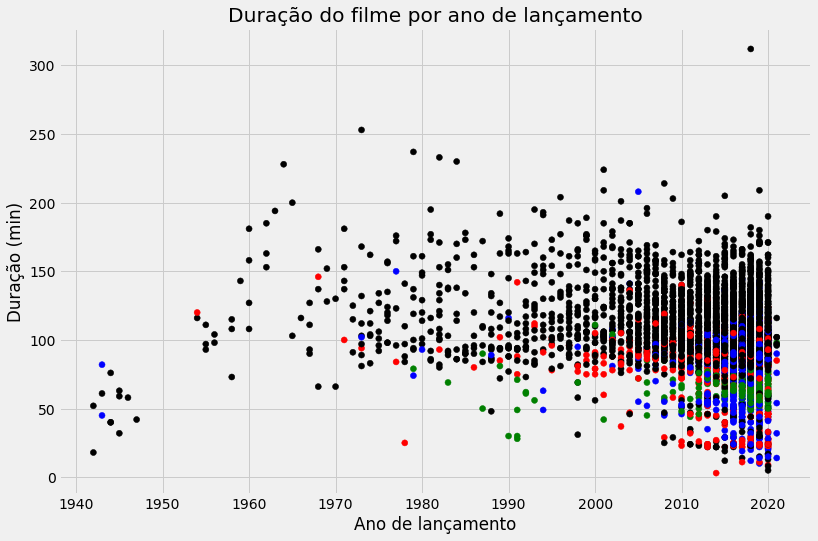

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies_col_subset['release_year'],
           netflix_movies_col_subset['duration'],c = colors)

plt.title('Duração do filme por ano de lançamento')
plt.xlabel('Ano de lançamento')
plt.ylabel('Duração (min)')

plt.show()


Gêneros atípicos, como filmes infantis e documentários, estão todos agrupados na metade inferior do gráfico. 

Mas não podemos ter certeza até que façamos análises adicionais.